## Signals of gradient-echo MRI

### Sequence diagram
![sequence](sequence.jpeg)

* In this simple simulation, we ignore the off-resonance effect. 
* The RF pulses are applied along the y-axis; and therefore we only need to compute $M_x(t)$ and $M_z(t)$ in the absence of off-resonance effect.
* The magnetization vectors between 2 consecutive RF pulses are:
    * $ M_x(t) = M_x(0)\times \exp(-\frac{t}{T_2})$ 
    * $ M_z(t) = M_z(0)\times \exp(-\frac{t}{T_1}) + M_0 \times (1-\exp(-\frac{t}{T_1}))$
* Immediately after an RF pulse (flip angle= $\theta$ ), the magnetization vectors are:
    * $ \left[ \begin{array}{ccc} M_x^+ \\ M_z^+ \end{array}  \right] =  \left[ \begin{array}{ccc} \cos(\theta) & \sin(\theta)  \\ -\sin(\theta) & cos(\theta) \end{array} \right] \left[ \begin{array}{ccc} M_x^- \\ M_z^- \end{array}  \right]$
* We assume $M_0$ = 1   

### Parameters in this simulation

In [226]:
θ = π/4; # a 45-degree RF pulse
TR = 1.5 # sec
T1 = 1.0 # sec
T2 = 0.01 # sec
M0 = 1;

In [227]:
using PyPlot

### RF pulse #1
* The magnetization vector before the first RF pulse is 

    $ \left[ \begin{array}{ccc} M_x^{1-} \\ M_z^{1-} \end{array} \right] = \left[ \begin{array}{ccc} 0 \\ M_0 \end{array} \right] $
    
    
* Immediately after a $\theta$-degree RF pulse, the magnetization vector is 

    $ \left[ \begin{array}{ccc} M_x^{1+} \\ M_z^{1+} \end{array}  \right]= \left[ \begin{array}{ccc} \cos(\theta) & \sin(\theta)  \\ -\sin(\theta) & cos(\theta) \end{array} \right] \left[ \begin{array}{ccc} 0 \\ M_0 \end{array}  \right]$

In [228]:
M1minus_x = 0
M1minus_z = M0
transformation = [cos(θ) sin(θ); -sin(θ) cos(θ)]
M1plus_x, M1plus_z = transformation*[M1minus_x,M1minus_z]

2-element Array{Float64,1}:
 0.707107
 0.707107

### Between RF pulse #1 and RF pulse #2
* Initially the magnetization vectors are

    $ \left[ \begin{array}{ccc} M_x^{1+} \\ M_z^{1+} \end{array}  \right] $
    
    
* After a period of time (TR), the magnetization vectors become 
    
    $ \left[ \begin{array}{ccc} M_x^{2-} \\ M_z^{2-} \end{array}  \right] $

In [229]:
M2minus_x = M1plus_x*exp(-TR/T2)
M2minus_z = M1plus_z*exp(-TR/T1) + M0*(1-exp(-TR/T1))

0.9346466891797653

### RF pulse #2
* The magnetization vector immediately before the second RF pulse is 

    $ \left[ \begin{array}{ccc} M_x^{2-} \\ M_z^{2-} \end{array} \right]$
    
    
* Immediately after a $\theta$-degree RF pulse, the magnetization vector is 

    $ \left[ \begin{array}{ccc} M_x^{2+} \\ M_z^{2+} \end{array}  \right]= \left[ \begin{array}{ccc} \cos(\theta) & \sin(\theta)  \\ -\sin(\theta) & cos(\theta) \end{array} \right] \left[ \begin{array}{ccc} M_x^{2-} \\ M_z^{2-} \end{array}  \right]$

In [230]:
M2plus_x, M2plus_z = transformation*[M2minus_x,M2minus_z]

2-element Array{Float64,1}:
 0.660895
 0.660895

### Between RF pulse #2 and RF pulse #3
* Initially the magnetization vectors are

    $ \left[ \begin{array}{ccc} M_x^{2+} \\ M_z^{2+} \end{array}  \right] $
    
    
* After a period of time (TR), the magnetization vectors become 
    
    $ \left[ \begin{array}{ccc} M_x^{3-} \\ M_z^{3-} \end{array}  \right] $

In [231]:
M3minus_x = M2plus_x*exp(-TR/T2)
M3minus_z = M2plus_z*exp(-TR/T1) + M0*(1-exp(-TR/T1))

0.9243354497053824

### RF pulse #3
* The magnetization vector immediately before the second RF pulse is 

    $ \left[ \begin{array}{ccc} M_x^{3-} \\ M_z^{3-} \end{array} \right]$
    
    
* Immediately after a $\theta$-degree RF pulse, the magnetization vector is 

    $ \left[ \begin{array}{ccc} M_x^{3+} \\ M_z^{3+} \end{array}  \right]= \left[ \begin{array}{ccc} \cos(\theta) & \sin(\theta)  \\ -\sin(\theta) & cos(\theta) \end{array} \right] \left[ \begin{array}{ccc} M_x^{3-} \\ M_z^{3-} \end{array}  \right]$

In [232]:
M3plus_x, M3plus_z = transformation*[M3minus_x,M3minus_z]

2-element Array{Float64,1}:
 0.653604
 0.653604

### Between RF pulse #3 and RF pulse #4
* Initially the magnetization vectors are

    $ \left[ \begin{array}{ccc} M_x^{3+} \\ M_z^{3+} \end{array}  \right] $
    
    
* After a period of time (TR), the magnetization vectors become 
    
    $ \left[ \begin{array}{ccc} M_x^{4-} \\ M_z^{4-} \end{array}  \right] $

In [233]:
M4minus_x = M3plus_x*exp(-TR/T2)
M4minus_z = M3plus_z*exp(-TR/T1) + M0*(1-exp(-TR/T1))

0.9227085748284458

### RF pulse #4
* The magnetization vector immediately before the second RF pulse is 

    $ \left[ \begin{array}{ccc} M_x^{4-} \\ M_z^{4-} \end{array} \right]$
    
    
* Immediately after a $\theta$-degree RF pulse, the magnetization vector is 

    $ \left[ \begin{array}{ccc} M_x^{4+} \\ M_z^{4+} \end{array}  \right]= \left[ \begin{array}{ccc} \cos(\theta) & \sin(\theta)  \\ -\sin(\theta) & cos(\theta) \end{array} \right] \left[ \begin{array}{ccc} M_x^{4-} \\ M_z^{4-} \end{array}  \right]$

In [234]:
M4plus_x, M4plus_z = transformation*[M4minus_x,M4minus_z]

2-element Array{Float64,1}:
 0.652453
 0.652453

### Let us compare the magnetization vectors across TRs

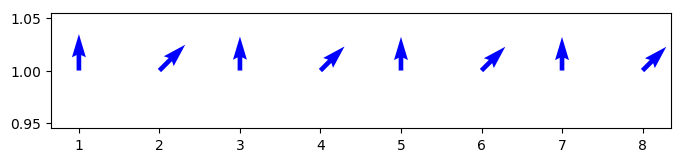

In [235]:
figure(1,figsize=(8,1.5)); quiver(1:8, ones(8), [M1minus_x,M1plus_x,M2minus_x,M2plus_x,M3minus_x,M3plus_x,M4minus_x,M4plus_x], [M1minus_z,M1plus_z,M2minus_z,M2plus_z,M3minus_z,M3plus_z,M4minus_z,M4plus_z], color="blue");

In [236]:
display(M1plus_x/M0)
display(M2plus_x/M0)
display(M3plus_x/M0)
display(M4plus_x/M0)

0.7071067811865475

0.6608950119325674

0.6536038645777927

0.6524534903201689

### Homework: Let us try different simulation parameters ($\theta$, TR, T1, T2 etc )

### Optional: can you re-write this simulation procedure with a for-loop (so that you can more easily compute signals across many more TRs)?
### Optional: can you expand the simulation code to include off-resonance effect?